Andew Ng coursera with gradient descent

In [78]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import scale
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [79]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # It is not explicitly used but is required for 3d projections 
import seaborn as sns

In [5]:
#Address
path = '/Users/ljn197/Machine_learning/Data/'
file = 'ex1data1.txt'

In [13]:
df_raw = pd.read_csv(path+file, header=None, names=['x','y']) # for removing Unnamed:0

In [14]:
df_raw.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<IPython.core.display.Javascript object>


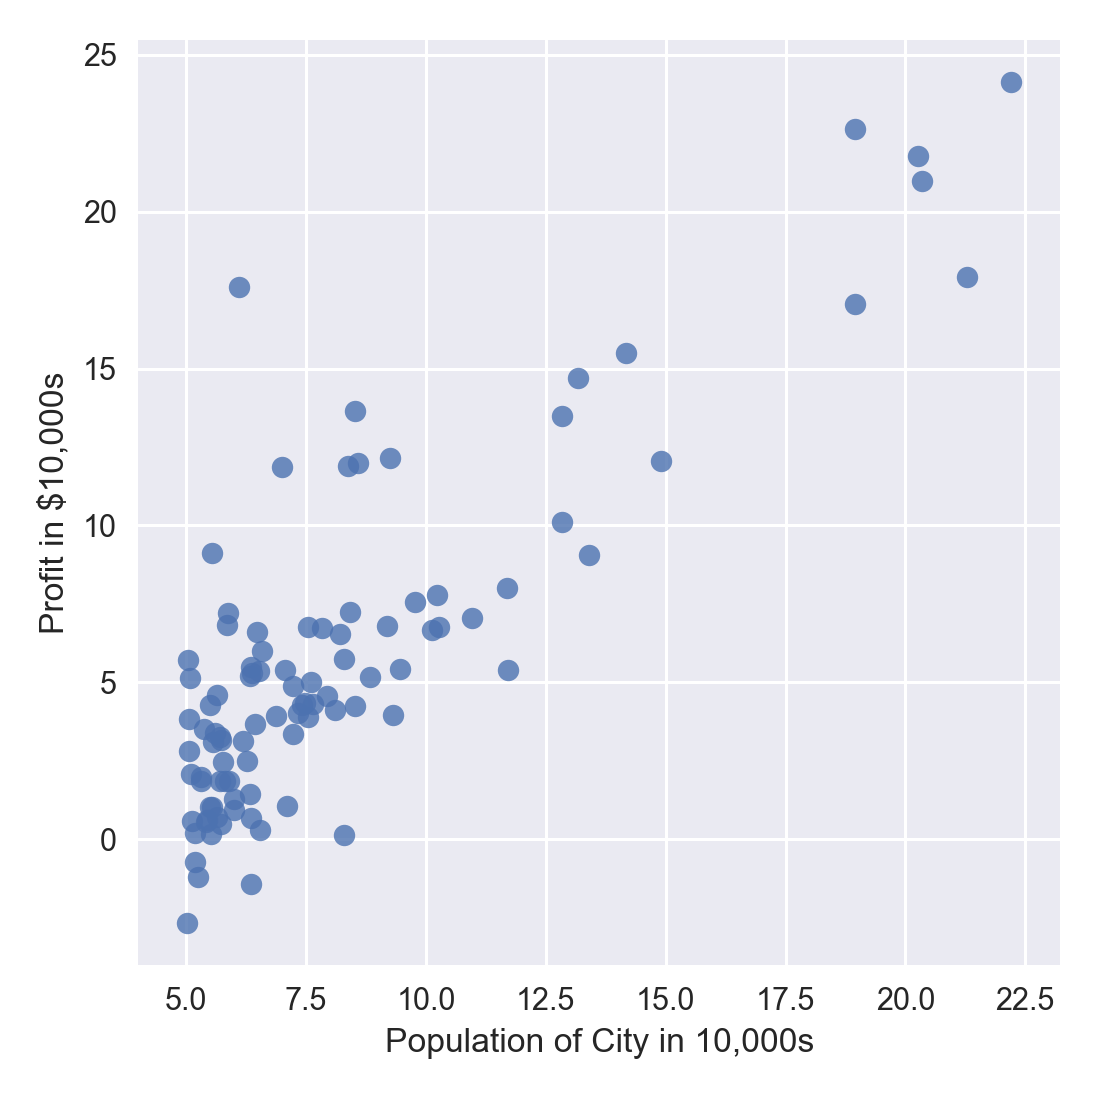

In [21]:
ax = sns.lmplot(x = 'x',y='y', data=df_raw, fit_reg=False)
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s')
plt.show()

In [69]:
X = df_raw['x']
y = df_raw['y']
#adding constant for having intercept in sm
X_with_const = sm.add_constant(X)
est = sm.OLS(y, X_with_const).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.02e-26
Time:                        18:31:45   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.000      -5.324      -2.467
x              1.1930      0.080     14.961      0.000       1.035       1.351
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           1.455   Prob(JB):                     3.29e-24
Kurtosis:                       7.276   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
y_pred = est.predict(X_with_const)

<IPython.core.display.Javascript object>


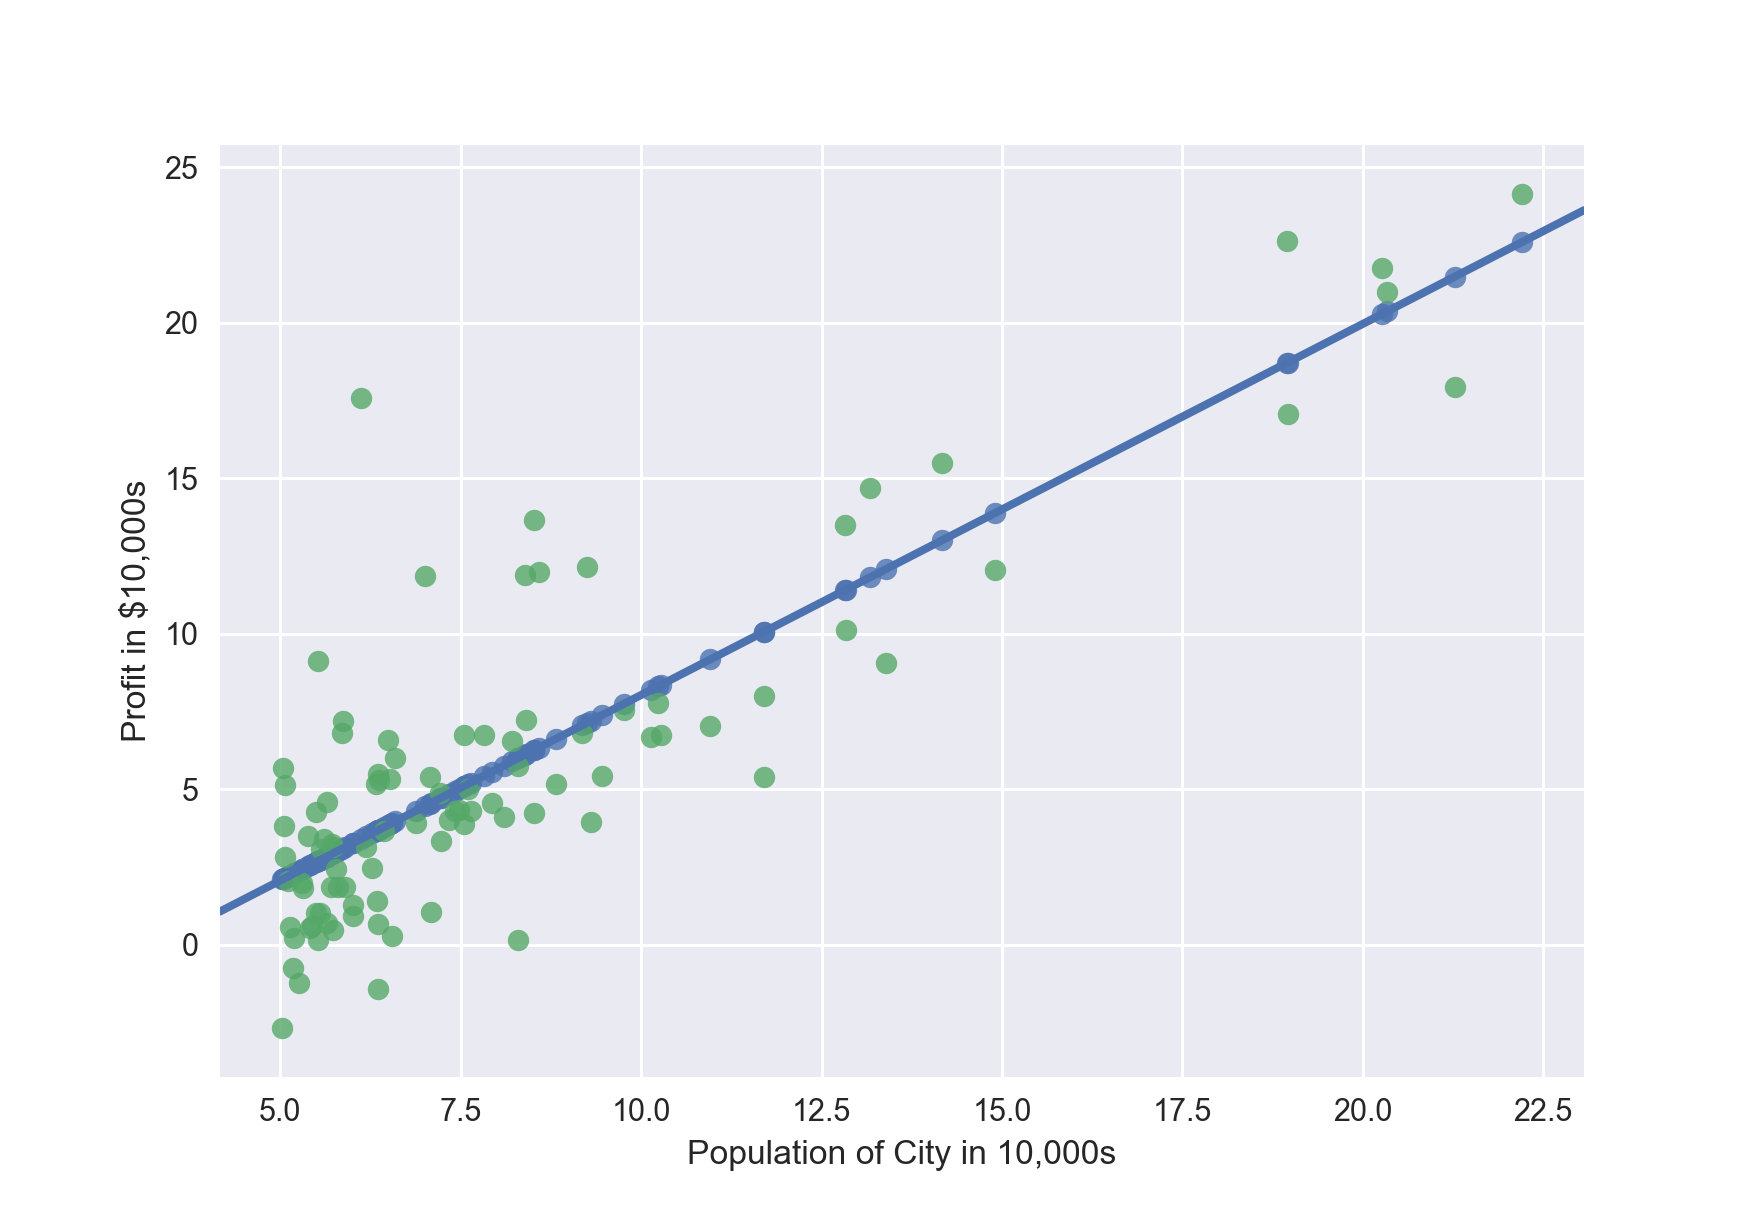

[<matplotlib.text.Text at 0x12157dfd0>, <matplotlib.text.Text at 0x1215709e8>]

In [71]:
fig, axs = plt.subplots()
sns.regplot(x=X_with_const.x, y= y_pred, fit_reg=True, ax=axs)
sns.regplot(x = 'x',y='y', data=df_raw, fit_reg=False, ax=axs)
axs.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s')


In [76]:
est.mse_total # 30.362990121429423
#Sum of squared (whitened) residuals.
est.ssr #868.53244693918464
#Explained sum of squares
est.ess #2046.3146047180401
#Mean squared error of the residuals. The sum of squared residuals divided by the residual degrees of freedom.
est.mse_resid # 9.1424468098861542
# Residuals, normalized to have unit variance.

array([ 4.69572726,  2.12698335,  2.44565659,  2.44563118,  1.23299485,
        1.91182944, -0.22341088,  1.87251264,  0.91155654,  0.55630585,
        0.11076807,  0.82769304,  0.06946112,  0.3605171 , -0.7003408 ,
        0.32770869,  0.53129351, -0.55027274, -0.04072837,  0.28091187,
       -0.1155636 ,  0.48947131,  0.53210787,  0.50800582,  0.11217177,
        1.30033608,  0.69205984, -0.70431109,  0.94864536,  0.51390073,
       -1.1874759 ,  0.67170684,  1.65243019, -0.42459796,  0.21241306,
       -0.33295286, -0.54454098,  0.19846106, -0.43027462,  0.59972621,
       -0.66087811, -0.13353842, -1.55006705, -0.18250719,  0.42744743,
       -1.16423147,  0.98575025, -0.39074804, -0.68077131, -0.56145239,
        0.54585343, -0.19740519, -0.22247352, -0.05849663, -0.73955786,
       -1.69057406, -0.36841287,  0.58592438, -1.07459633, -0.6510619 ,
       -0.48412324, -1.00080709, -1.17797512, -0.60720187, -0.55196373,
        0.05603345, -0.08478252, -0.17882753, -0.54500007,  0.20

In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()
#Per the docs, "X : numpy array or sparse matrix of shape [n_samples,n_features]"
X_sci = df_raw.x.values.reshape(-1,1)
# Train the model using the training sets
regr.fit(X_sci, y)

# Make predictions using the testing set
y_pred_scikit = regr.predict(X_sci) #scikit learn doesn't need the adding of constant
print(regr.intercept_)
print(regr.coef_)

-3.89578087831
[ 1.19303364]


## Gradient Descent

In [52]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [53]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]


In [59]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [67]:
points = np.genfromtxt(path+file, delimiter=",")
#points = df_raw
learning_rate = 0.01
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10000
print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
print ("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

Starting gradient descent at b = 0, m = 0, error = 64.14546775491131
Running...
After 10000 iterations b = -3.8957808783117955, m = 1.1930336441895877, error = 8.953942751950361


In [81]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

Automatically created module for IPython interactive environment


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TypeError: predict() got an unexpected keyword argument 'return_std'